# PIV DATA Pitching flexible foil dynamics 

In [1]:
%reload_ext autoreload
import pylab, socket
import numpy as np
import matplotlib.pyplot as plt
import glob,os,sys
from sklearn import cluster
import sympy as sp
from matplotlib import animation, rc
from IPython.display import HTML
from PIV_flap_class import PIV_ala
import ReadIM
import pickle
import time
from IPython.display import  Latex
from ipywidgets import interact, interact_manual,interactive,widgets,Layout

In [2]:
dir_r = 'PIV_flap/U_field_cluster'
list_exp = np.sort(glob.glob(dir_r+'/*'))


In [3]:
experiment_i = list_exp[0]
with open(experiment_i, 'rb') as input:
    piv_data = pickle.load(input)

In [4]:

x,y ,vx,vy = [piv_data.x,piv_data.y,piv_data.vx,piv_data.vy]


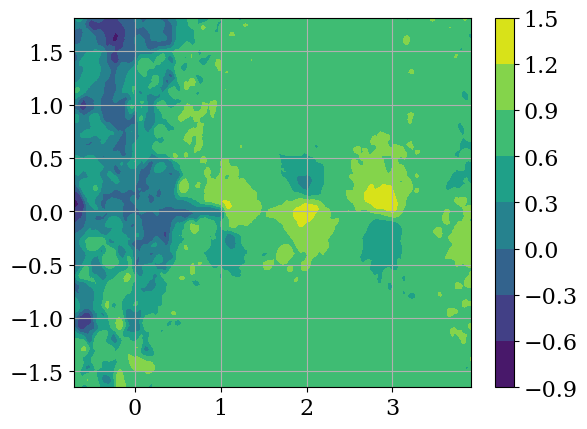

In [5]:
i_snapshot = 10
fig,ax = plt.subplots()
mapx = ax.contourf(x,y,vx[0].T)
ax.grid()
fig.colorbar(mapx);

In [6]:
# retained snapshots (good quality)
index_input = piv_data.indices_in[0]
# cluster number
cluster_number = np.arange(12)
# corresponding cluster for each snapshot
label_data = piv_data.kmeans_uy_labels

In [7]:
selected_cluster = label_data[i_snapshot]
vx_cluster = piv_data.vx[index_input][label_data==cluster_number[selected_cluster]].mean(0)

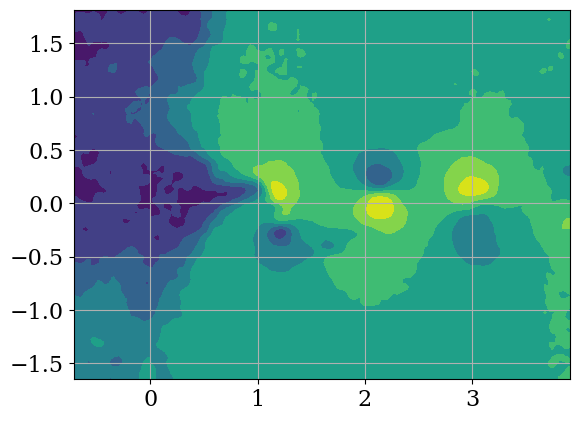

In [8]:
fig,ax = plt.subplots(1,1)


selected_cluster = piv_data.n_orden[i_snapshot]
#selected_cluster = i_snapshot
vx_cluster = piv_data.vx[index_input][label_data==cluster_number[selected_cluster]].mean(0)

mapx = ax.contourf(x,y,vx_cluster.T)
ax.grid()


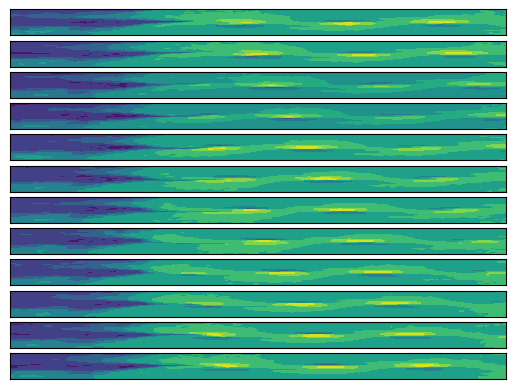

In [82]:
fig,ax = plt.subplots(12,1)
axs = ax.ravel()
for i_snapshot in range(12):
    selected_cluster = piv_data.n_orden[i_snapshot]
    #selected_cluster = i_snapshot
    vx_cluster = piv_data.vx[index_input][label_data==cluster_number[selected_cluster]].mean(0)
    
    mapx = axs[i_snapshot].contourf(x,y,vx_cluster.T)
    axs[i_snapshot].grid()
    axs[i_snapshot].axes.get_xaxis().set_visible(False)
    axs[i_snapshot].axes.get_yaxis().set_visible(False)
#fig.colorbar(mapx);

array([ 9,  1, 10,  3,  8,  5,  0,  4,  6, 11,  2,  7])